# G2M insight for Cab Investment firm

## ☑️Data Validation and Cleaning

- ### Identify and Modify Data Types:
    - Review data types using `.info()`.
    - Create lists of numerical and string features.
    - Print descriptive statistics of numerical data using `.describe()`.
    - Print count of string values using `.value_counts()`.
    - Modify data types as appropriate.
- ### Identify and Fill Missing Values:
    - Identify null values using `.isna()`.
    - Impute null values with their mean, median, mode, etc.
    - Delete rows or columns with null values.
- ### Identify and Correct Outliers:
    - Apply the Tukey method.
    - Univariate Analysis: Boxplot graphs, histograms, Q-Q plots, and descriptive statistics.
    - Multivariate Analysis: Scatter plots, bar charts, and techniques like Mahalanobis Distance or Residual Analysis.
    - Remove or retain outliers as appropriate.
- ### Correct String Data:
    - Print count of non-numeric values using `.value_counts()`.
    - Correct incorrect data using `.str()`.
- ### Remove Duplicates:
    - Identify and remove duplicate data.


In [1]:
# Import all libraries to pre processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib as mpl
from scipy import stats
from scipy.stats import norm, skew, kurtosis
import statsmodels.api as sm
import warnings

mpl.style.use('ggplot')
colors = ['#3B9086', '#EF633F', "#EFF2D9", "#E8CF91", "#D66322"]
sns.set_style("whitegrid")
sns.set_palette(colors)
pylab.rcParams['figure.figsize'] = 10,6
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
warnings.filterwarnings('ignore')

In [2]:
# Import data
Cab_Data = pd.read_csv('Cab_Data.csv')
Customer_ID =  pd.read_csv("Customer_ID.csv")
Transaction_ID = pd.read_csv("Transaction_ID.csv")
City = pd.read_csv("City.csv")

In [3]:
Cab_Data.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA        30.450   
1        10000012           42375  Pink Cab  ATLANTA GA        28.620   
2        10000013           42371  Pink Cab  ATLANTA GA         9.040   
3        10000014           42376  Pink Cab  ATLANTA GA        33.170   
4        10000015           42372  Pink Cab  ATLANTA GA         8.730   

   Price Charged  Cost of Trip  
0        370.950       313.635  
1        358.520       334.854  
2        125.200        97.632  
3        377.400       351.602  
4        114.620        97.776

In [4]:
Transaction_ID.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [5]:
Customer_ID.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [6]:
City.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [7]:
# Check the shape
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City Data", City.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [8]:
# check the basic information 
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

In [9]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [10]:
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [11]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [12]:
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [13]:
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [14]:
Customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [15]:
Cab_Data.head(2)

Transaction_ID  Date_of_Travel   Company        City  KM_Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA        30.450   
1        10000012           42375  Pink Cab  ATLANTA GA        28.620   

   Price_Charged  Cost_of_Trip  
0        370.950       313.635  
1        358.520       334.854

In [16]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [17]:
Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [18]:
Cab_Data.head(2)

Transaction_ID Date_of_Travel   Company        City  KM_Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA        30.450   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA        28.620   

   Price_Charged  Cost_of_Trip  
0        370.950       313.635  
1        358.520       334.854

In [19]:
months=[]
years =[]
for i in range(len(Cab_Data['Date_of_Travel'])):
    months.append(Cab_Data['Date_of_Travel'][i].month)
    years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month'] = months
Cab_Data['Year'] = years

Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)

In [20]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab
PinkCab = Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data[Cab_Data['Company']=='Yellow Cab']

In [21]:
Cab_Data.head()

Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0        10000011  Pink Cab  ATLANTA GA        30.450        370.950   
1        10000012  Pink Cab  ATLANTA GA        28.620        358.520   
2        10000013  Pink Cab  ATLANTA GA         9.040        125.200   
3        10000014  Pink Cab  ATLANTA GA        33.170        377.400   
4        10000015  Pink Cab  ATLANTA GA         8.730        114.620   

   Cost_of_Trip  Month  Year  
0       313.635      1  2016  
1       334.854      1  2016  
2        97.632      1  2016  
3       351.602      1  2016  
4        97.776      1  2016

## ☑️Exploratory Data Analysis (EDA)

- ### Distributions:
    - Visualize data distributions.
    - Use histograms, PMF, CDF, KDE, PDF, Normal, Kwed, Kurtosis.
- ### Relationships:
    - Explore relationships between features.
    - Use correlation matrix, box plot, etc.
- ### Descriptive Statistics:
    - Calculate descriptive statistics such as mean, median, variance, etc.

In [22]:
plot0 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

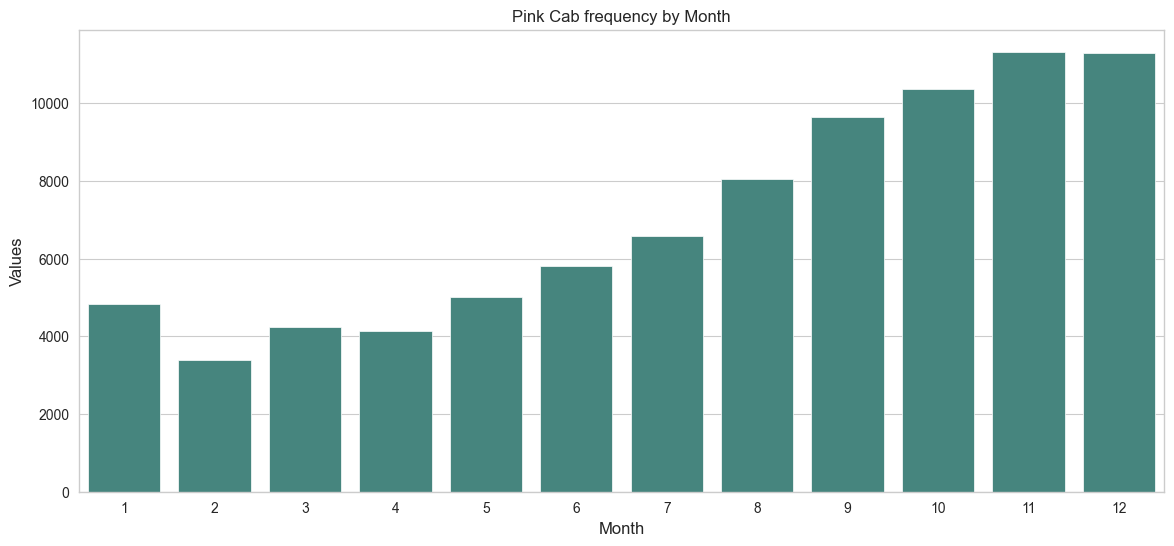

In [23]:
# Monthly Transaction Analysis
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Pink Cab frequency by Month',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

In [24]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

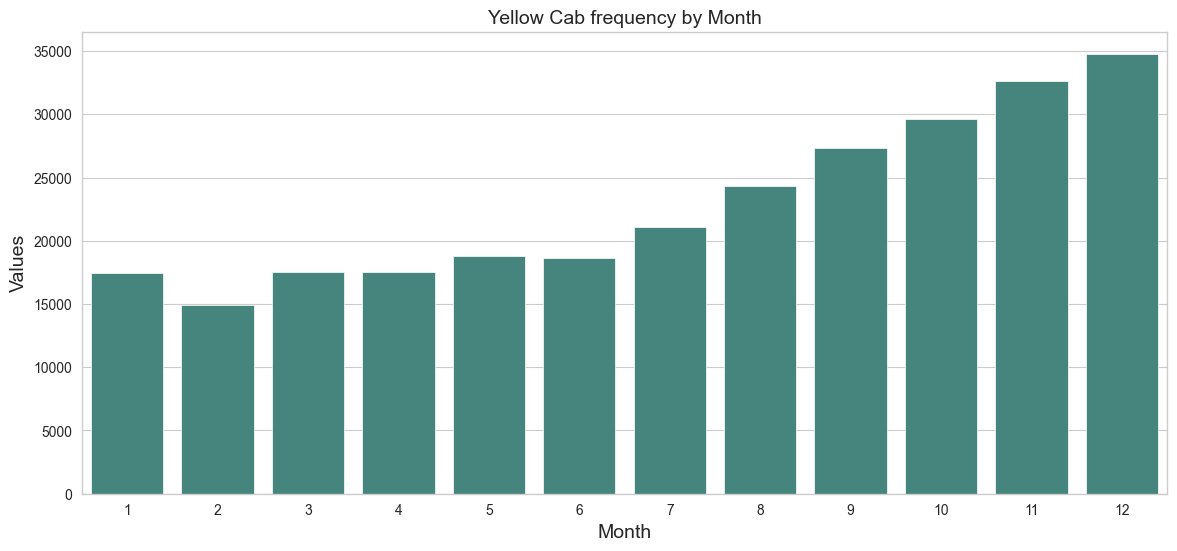

In [25]:
# Monthly Transaction Analysis
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Yellow Cab frequency by Month',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

**Findings:**
- Yellow Cab has higher travels (35000) in the month of December which is the holiday season compared to Pink Cab (11000).

In [26]:
overall_distance = Cab_Data['KM_Travelled'].describe()
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()

In [27]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

Overall   PinkCab  YellowCab
Count     359392.000 84711.000 274681.000
Mean          22.567    22.560     22.570
Std. Dev.     12.234    12.231     12.234
Min            1.900     1.900      1.900
25%           12.000    12.000     11.990
50%           22.440    22.440     22.440
75%           32.960    32.960     32.960
Max           48.000    48.000     48.000

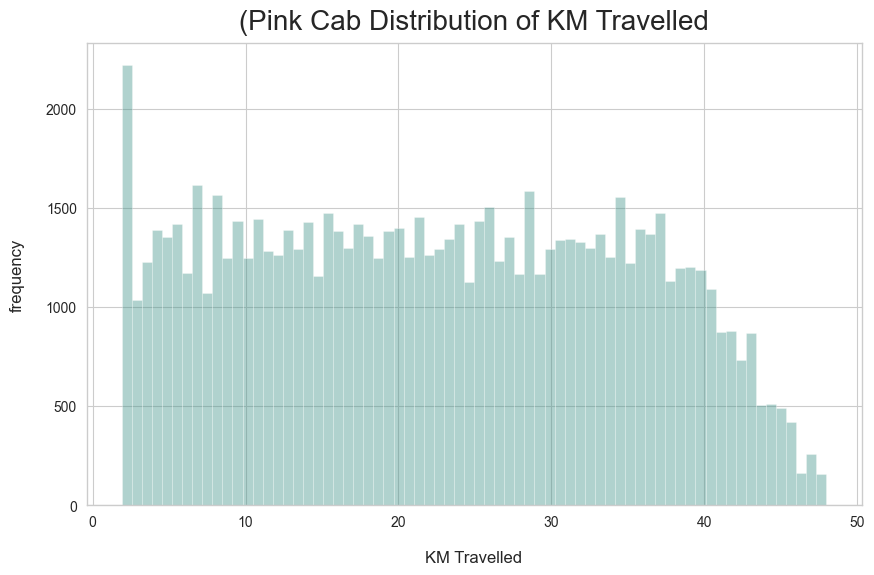

In [28]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, bins=70)
plt.title("(Pink Cab Distribution of KM Travelled", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

Text(0, 0.5, 'frequency')

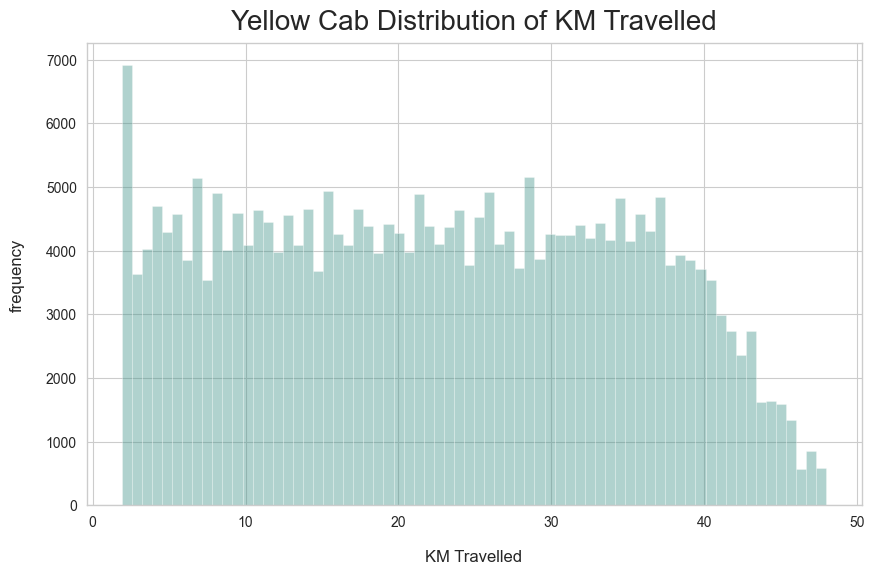

In [29]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False,bins=70)
plt.title("Yellow Cab Distribution of KM Travelled", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

**Findings:**
- From the above graphs, we can see that most of the rides are in the range of approximately 2 to 48 KM.

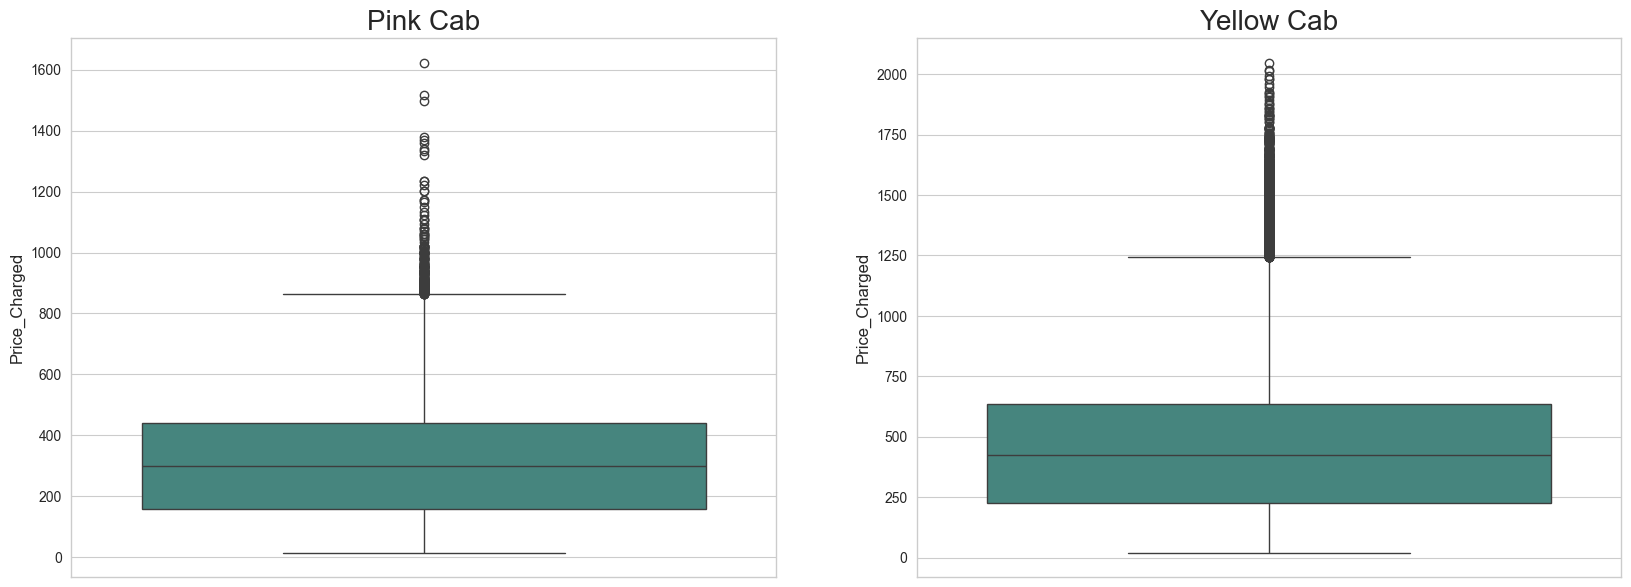

In [30]:
# Identify Outliers
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

**Findings:**
- These outliers are due to use of high-end cars so decided to keep it.

- The price charge range for Yellow cab is more than the Pink cab.


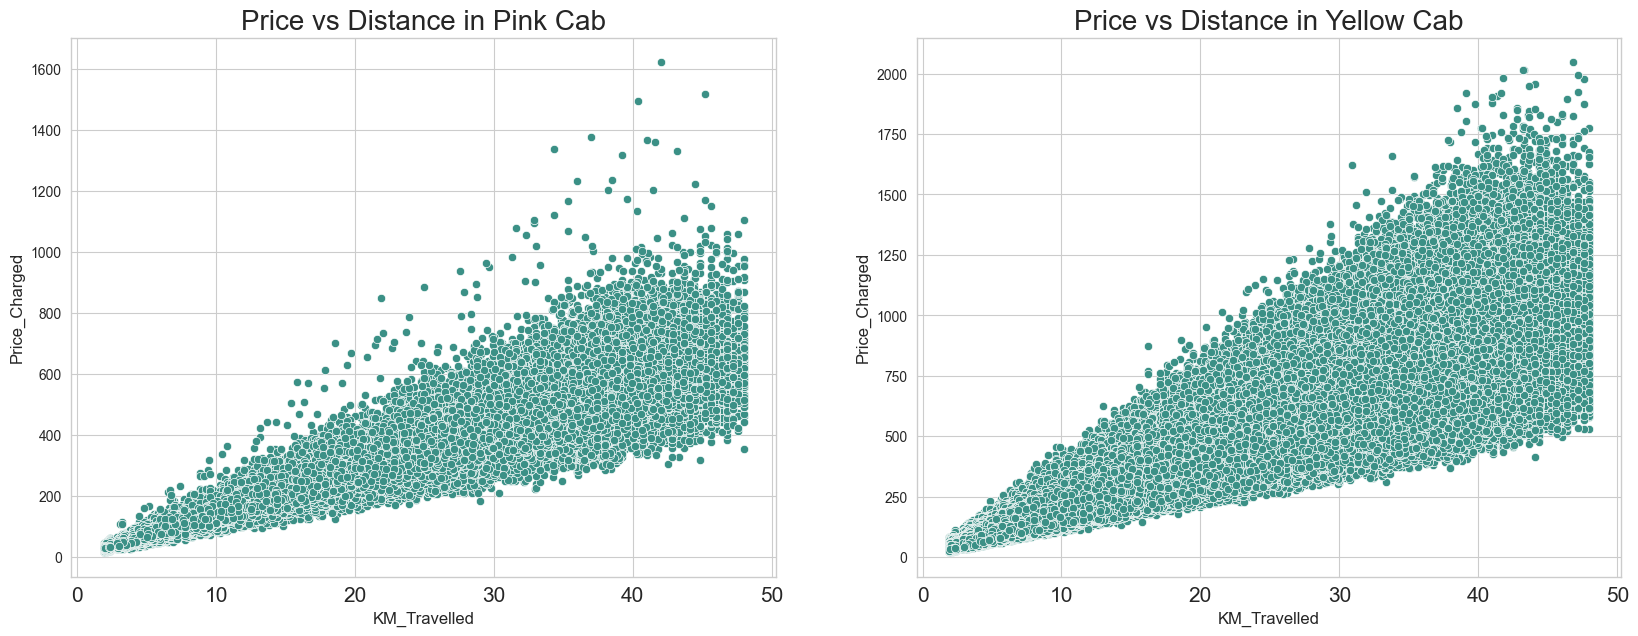

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(x=PinkCab['KM_Travelled'], y=PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(x=YellowCab['KM_Travelled'], y=YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

In [32]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594866

In [33]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

0.859708629447848

**Findings:**
- Distance is one of the important factors, which drives the price of the rides. 
- We could see that there is a positive correlation in the graph for both Pink and Yellow cab.
- The price for Yellow cab is higher compared to Pink cab.

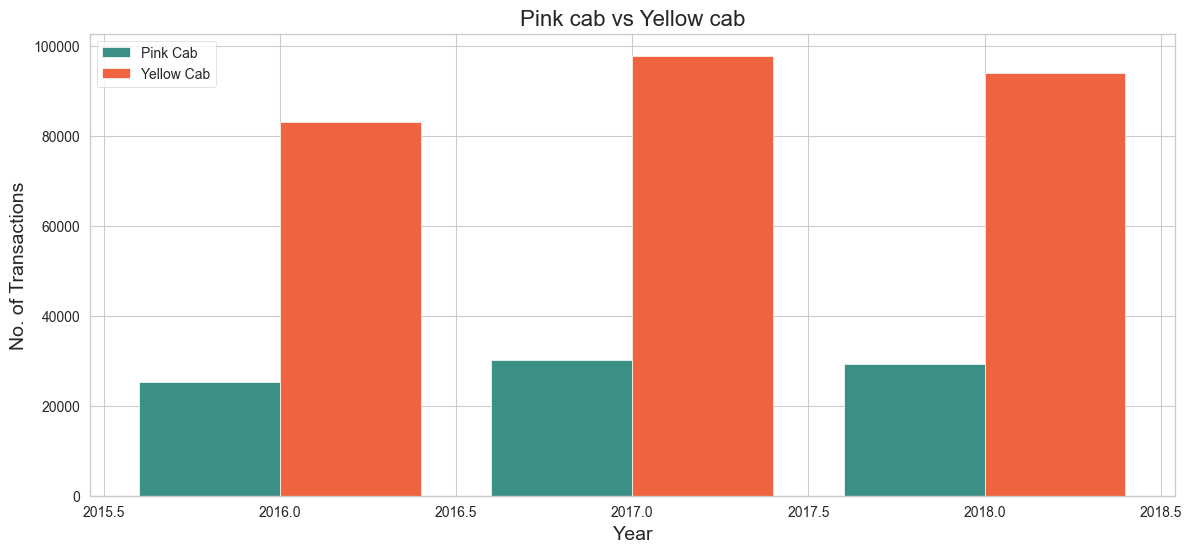

In [34]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

**Findings:**
- From the graph it shows that on yearly basis no. of transactions for Yellow cab is higher than Pink cab.

**Pink cab**

In [35]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016   315.850
2017   315.535
2018   301.538
Name: Price_Charged, dtype: float64

In [36]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016   247.039
2017   248.821
2018   248.414
Name: Cost_of_Trip, dtype: float64

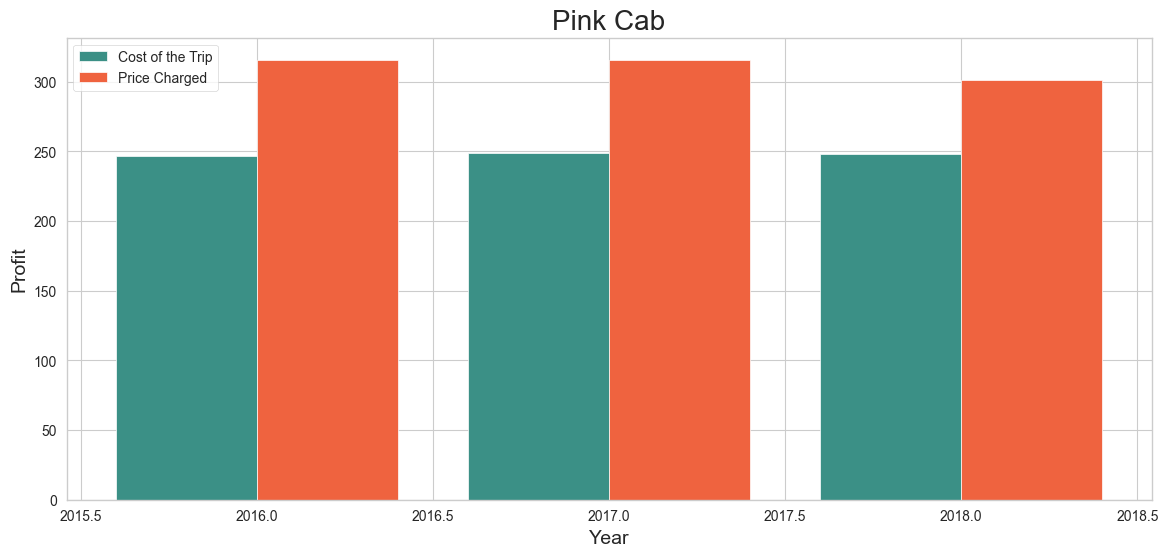

In [37]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

**Yellow Cab**

In [38]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

Year
2016   468.230
2017   466.278
2018   440.893
Name: Price_Charged, dtype: float64

In [39]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016   298.537
2017   297.862
2018   297.442
Name: Cost_of_Trip, dtype: float64

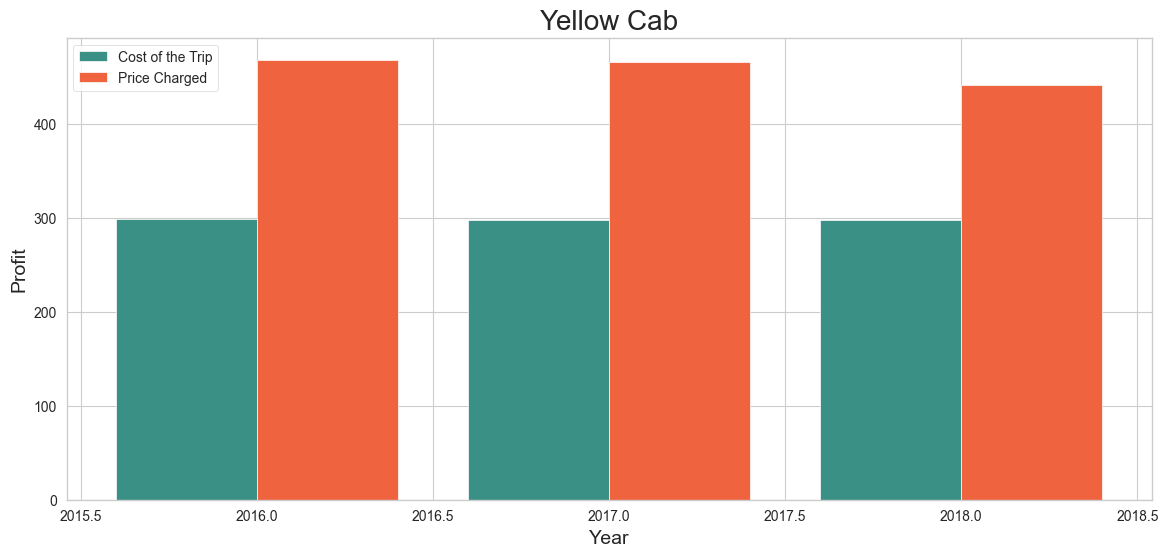

In [40]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

**Findings:**
- The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab

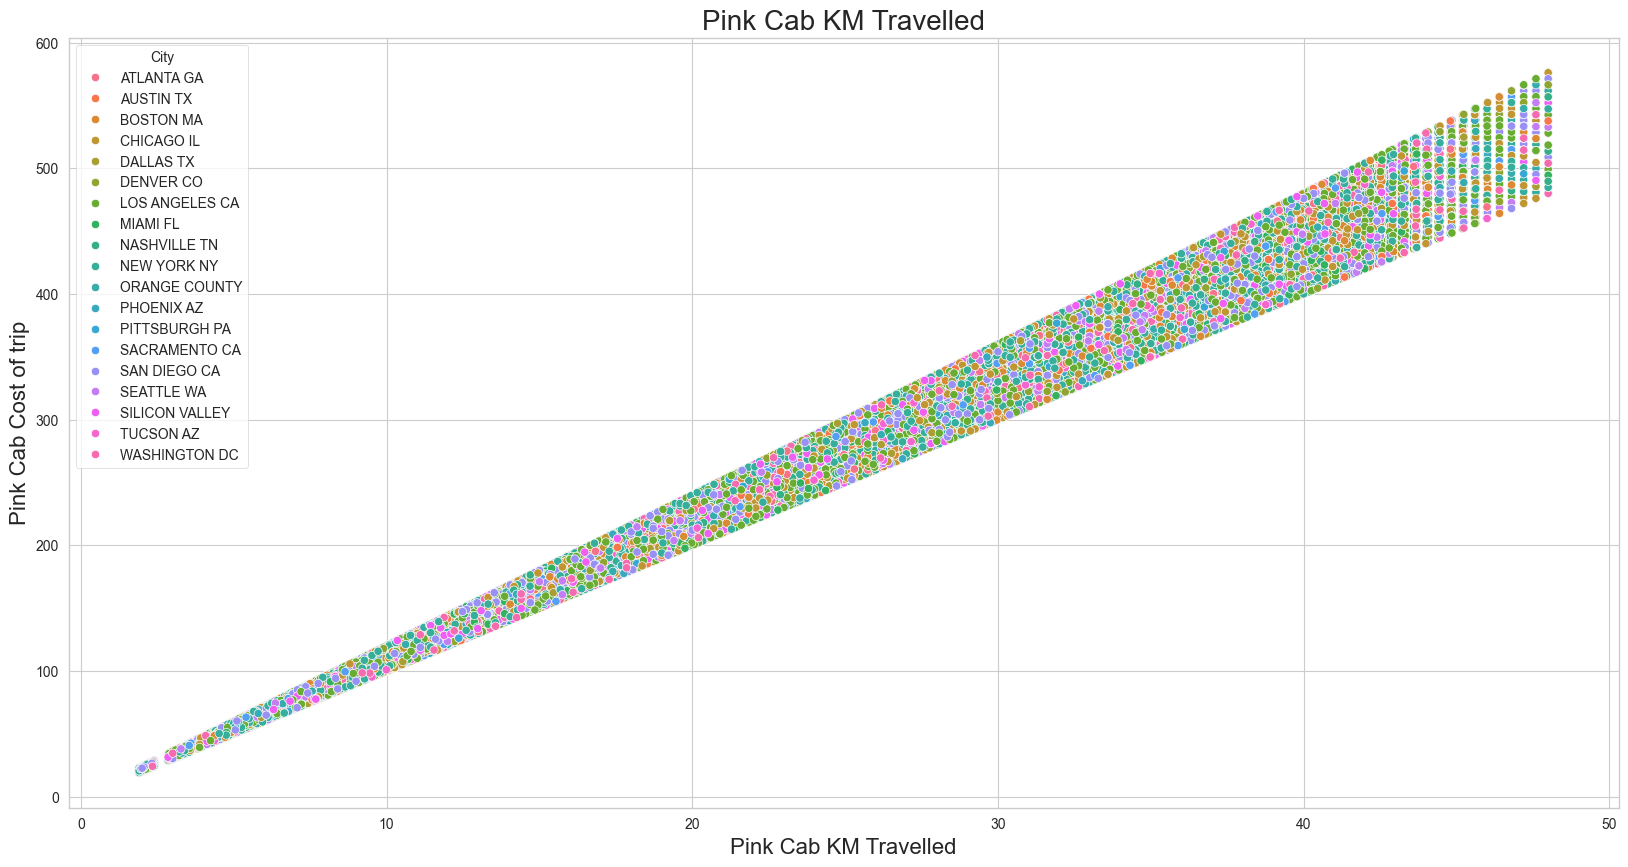

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

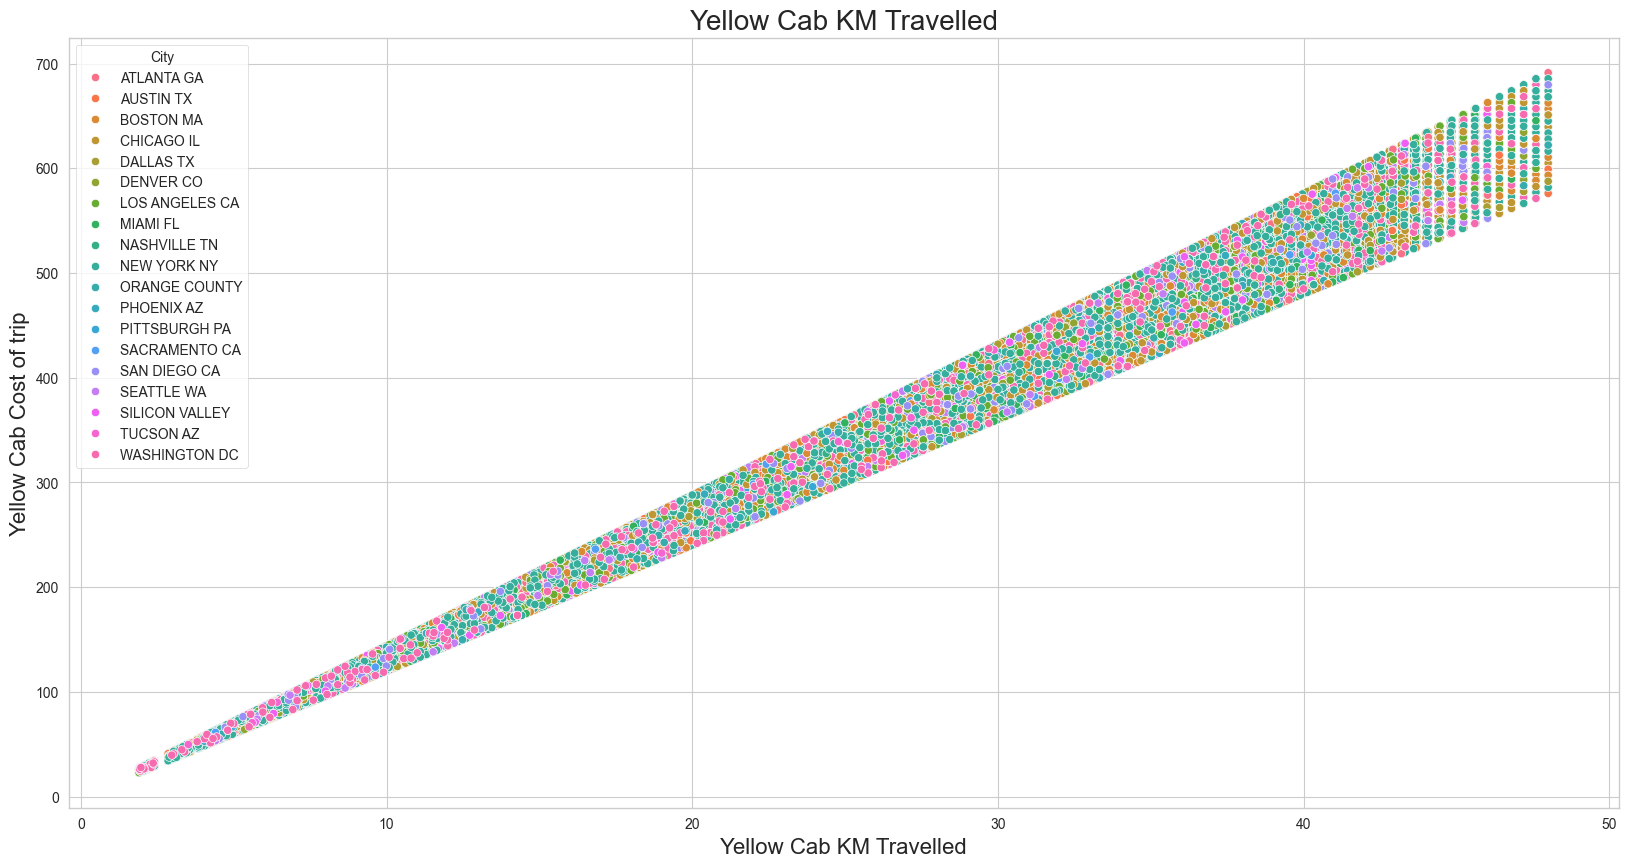

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

**Findings:**
- From the graph we see that the cost of trip for both Pink and Yellow cab are almost the same.

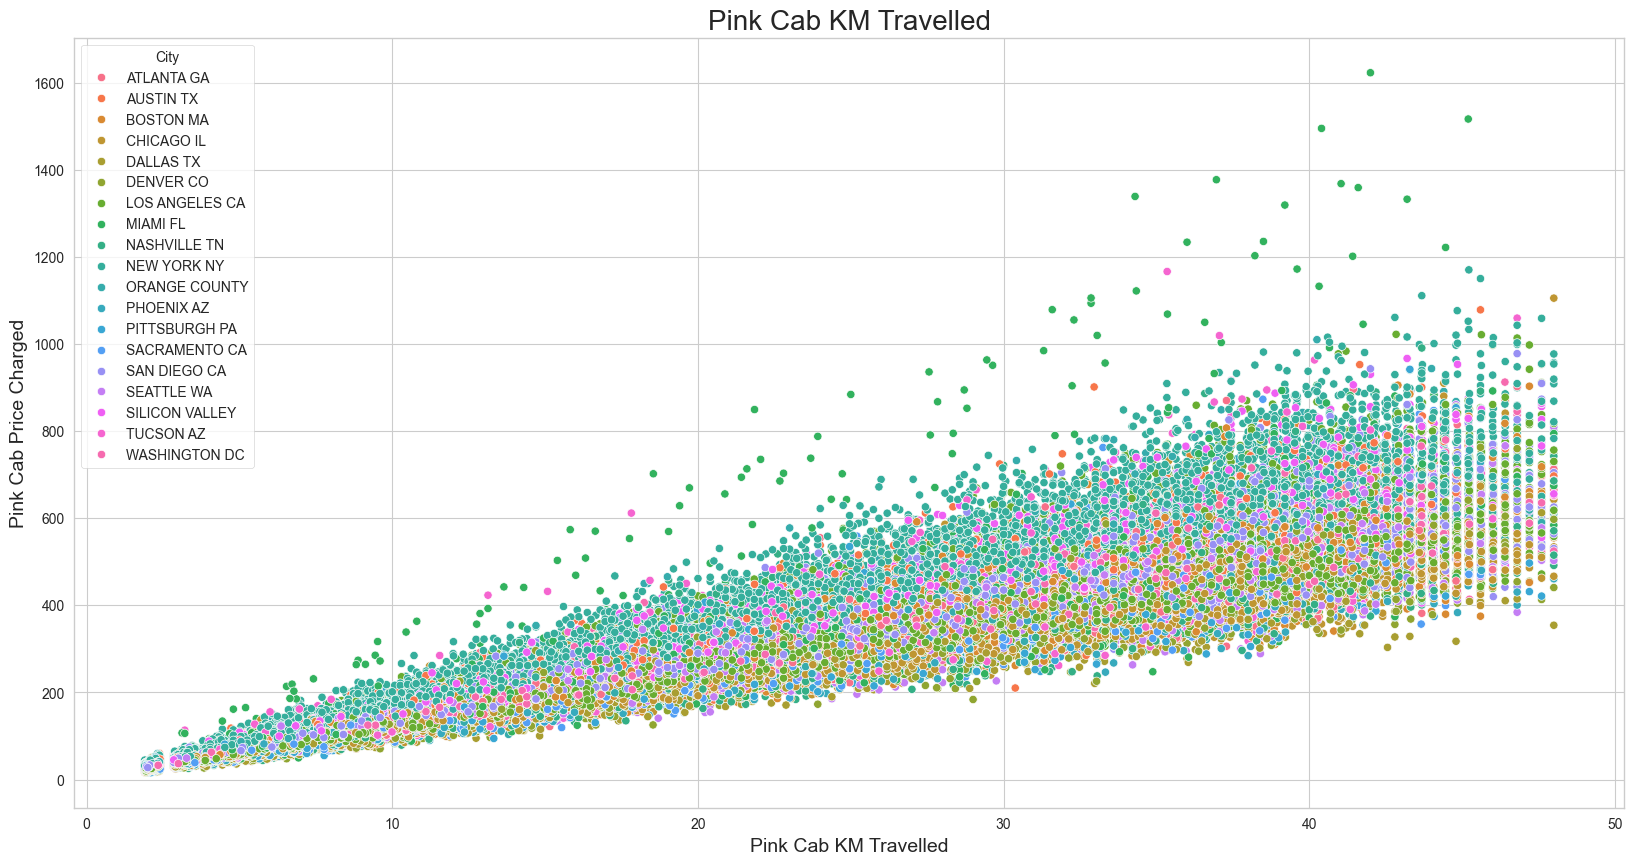

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()

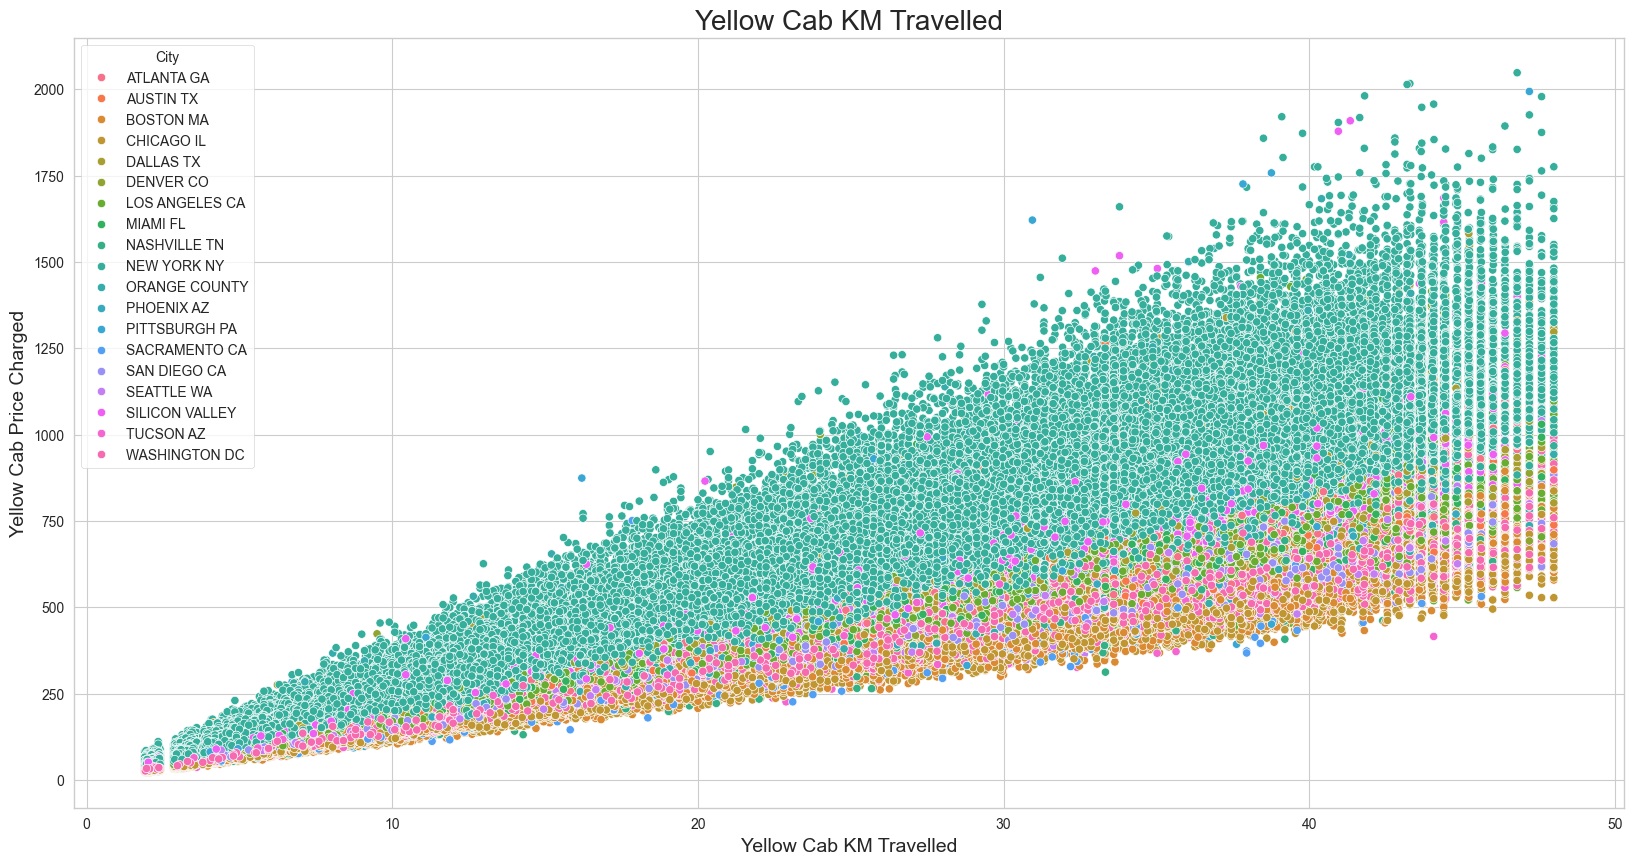

In [44]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()

**Findings:**
- From the graphs we see that for New York City the Yellow Cab price charged is more in comparison to the other cities. 
- and for Pink cab all the cities have the same increase in prices with increase in distance 
- the outliers exist in both the graphs  which may be due to high end cars or weather.

In [45]:
# Create a general dataframe
left = Cab_Data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data.head()

Company        City  KM_Travelled  Price_Charged  \
Transaction_ID                                                      
10000011        Pink Cab  ATLANTA GA        30.450        370.950   
10000012        Pink Cab  ATLANTA GA        28.620        358.520   
10000013        Pink Cab  ATLANTA GA         9.040        125.200   
10000014        Pink Cab  ATLANTA GA        33.170        377.400   
10000015        Pink Cab  ATLANTA GA         8.730        114.620   

                Cost_of_Trip  Month  Year  Customer_ID Payment_Mode  
Transaction_ID                                                       
10000011             313.635      1  2016        29290         Card  
10000012             334.854      1  2016        27703         Card  
10000013              97.632      1  2016        28712         Cash  
10000014             351.602      1  2016        28020         Cash  
10000015              97.776      1  2016        27182         Card

In [46]:
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data.head()

Company        City  KM_Travelled  Price_Charged  \
Transaction_ID Customer_ID                                                      
10000011       29290        Pink Cab  ATLANTA GA        30.450        370.950   
10000012       27703        Pink Cab  ATLANTA GA        28.620        358.520   
10000013       28712        Pink Cab  ATLANTA GA         9.040        125.200   
10000014       28020        Pink Cab  ATLANTA GA        33.170        377.400   
10000015       27182        Pink Cab  ATLANTA GA         8.730        114.620   

                            Cost_of_Trip  Month  Year Payment_Mode Gender  \
Transaction_ID Customer_ID                                                  
10000011       29290             313.635      1  2016         Card   Male   
10000012       27703             334.854      1  2016         Card   Male   
10000013       28712              97.632      1  2016         Cash   Male   
10000014       28020             351.602      1  2016         Cash   Male   
10000015       27182              97.776      1  2016         Card   Male   

                            Age  Income_(USD/Month)  
Transaction_ID Customer_ID                           
10000011       29290         28               10813  
10000012       27703         27                9237  
10000013       28712         53               11242  
10000014       28020         23               23327  
10000015       27182         33                8536

In [47]:
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data.head()

Company  KM_Travelled  Price_Charged  \
Transaction_ID Customer_ID City                                                
10000011       29290       ATLANTA GA  Pink Cab        30.450        370.950   
10000012       27703       ATLANTA GA  Pink Cab        28.620        358.520   
10000013       28712       ATLANTA GA  Pink Cab         9.040        125.200   
10000014       28020       ATLANTA GA  Pink Cab        33.170        377.400   
10000015       27182       ATLANTA GA  Pink Cab         8.730        114.620   

                                       Cost_of_Trip  Month  Year Payment_Mode  \
Transaction_ID Customer_ID City                                                 
10000011       29290       ATLANTA GA       313.635      1  2016         Card   
10000012       27703       ATLANTA GA       334.854      1  2016         Card   
10000013       28712       ATLANTA GA        97.632      1  2016         Cash   
10000014       28020       ATLANTA GA       351.602      1  2016         Cash   
10000015       27182       ATLANTA GA        97.776      1  2016         Card   

                                      Gender  Age  Income_(USD/Month)  \
Transaction_ID Customer_ID City                                         
10000011       29290       ATLANTA GA   Male   28               10813   
10000012       27703       ATLANTA GA   Male   27                9237   
10000013       28712       ATLANTA GA   Male   53               11242   
10000014       28020       ATLANTA GA   Male   23               23327   
10000015       27182       ATLANTA GA   Male   33                8536   

                                      Population     Users  
Transaction_ID Customer_ID City                             
10000011       29290       ATLANTA GA   814,885    24,701   
10000012       27703       ATLANTA GA   814,885    24,701   
10000013       28712       ATLANTA GA   814,885    24,701   
10000014       28020       ATLANTA GA   814,885    24,701   
10000015       27182       ATLANTA GA   814,885    24,701

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.2+ MB


In [49]:
data = data.reset_index()
data = data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [50]:
city_y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

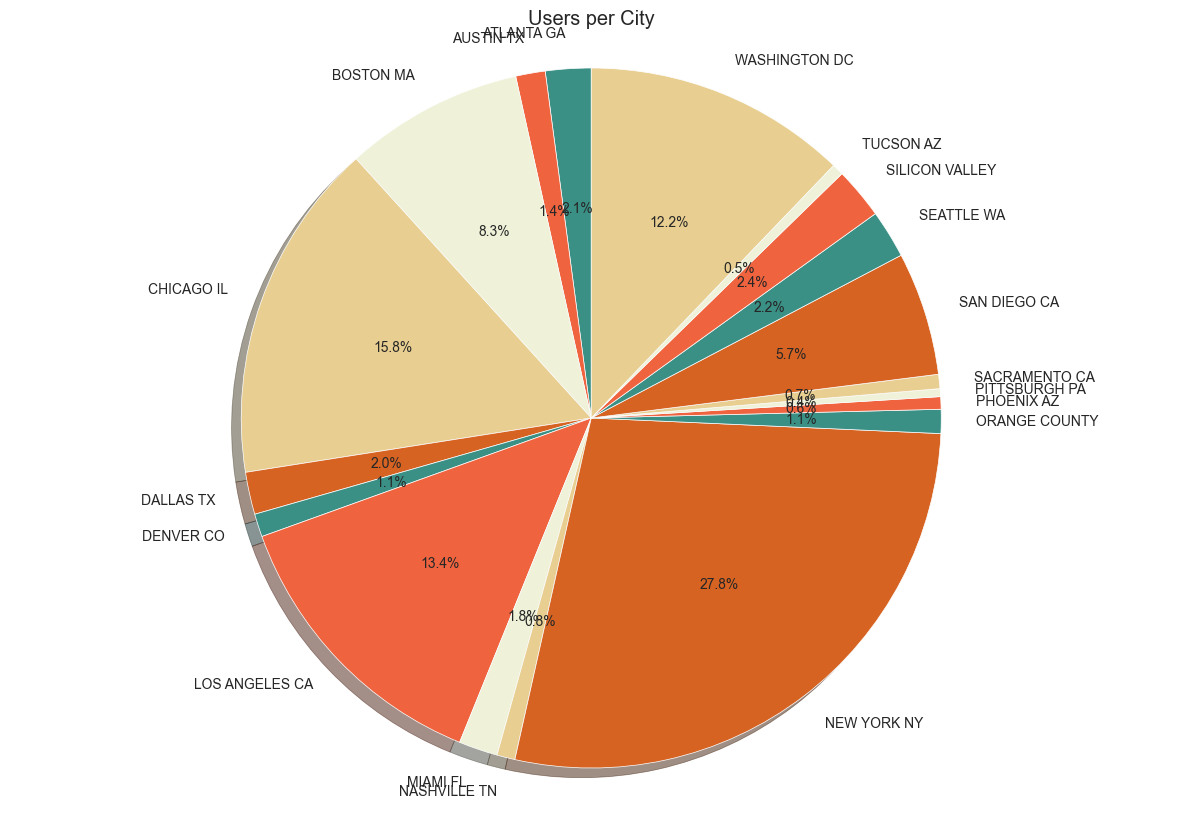

In [51]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(15,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

> **New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%**

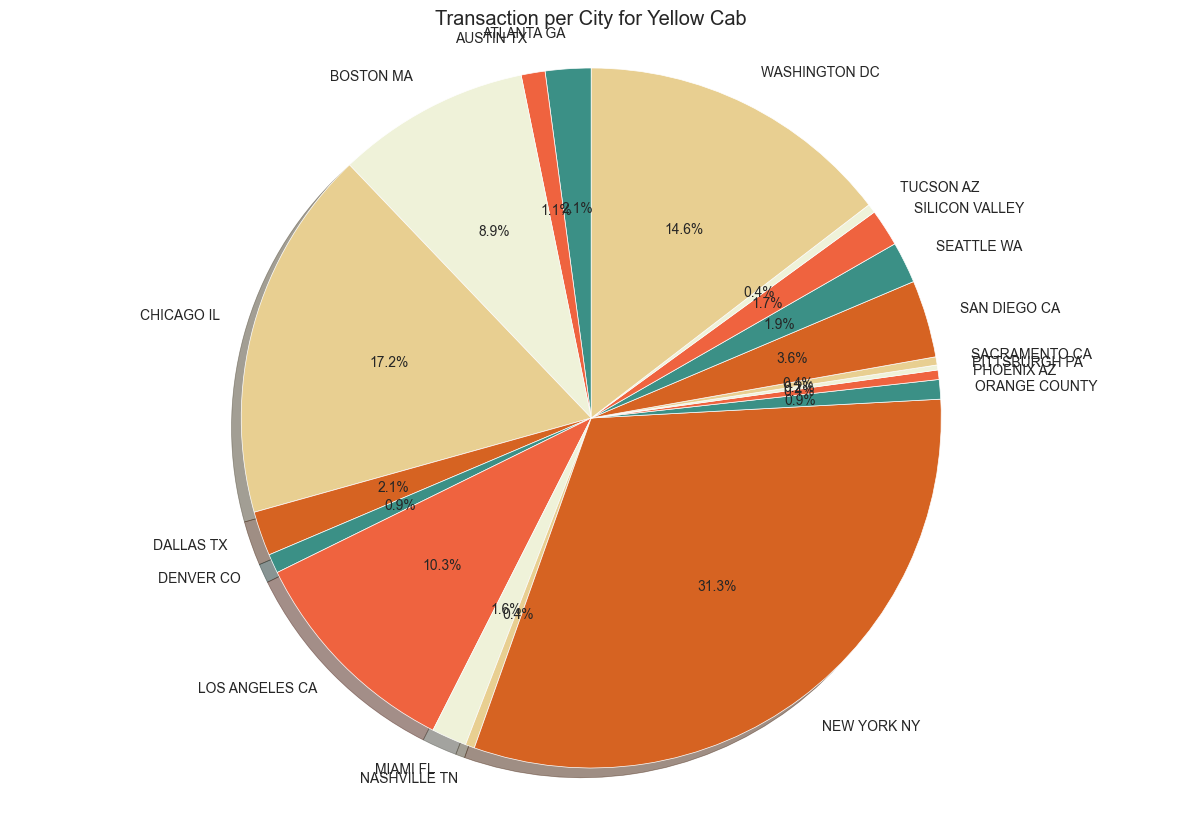

In [52]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(15,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [53]:
city_p = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

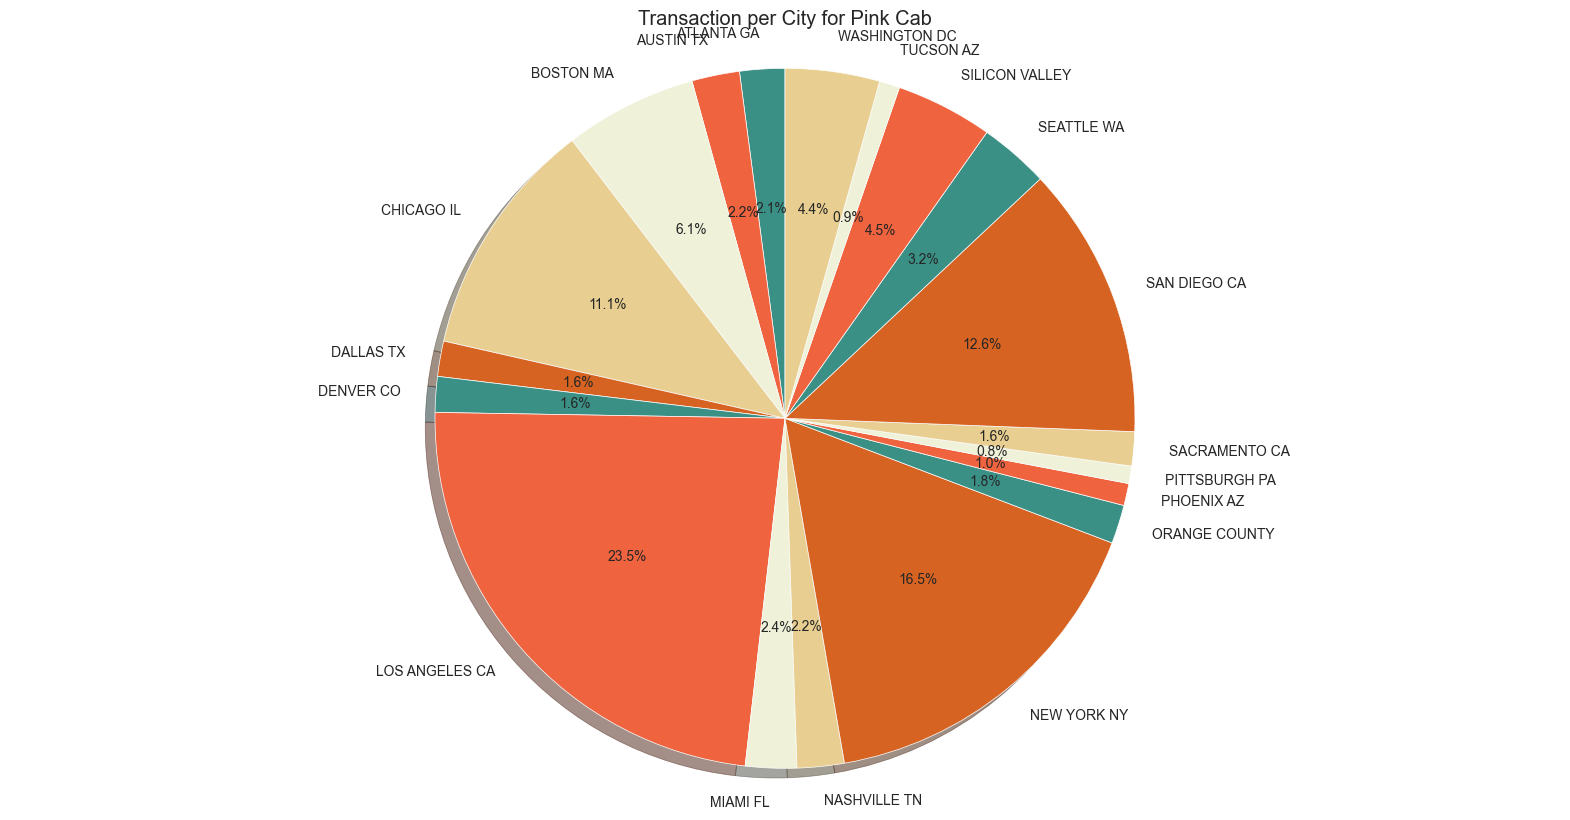

In [54]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

**Findings:**
- Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%**
- Transaction for Pink Cab is highest in Los Angeles City**

In [55]:
gender_y=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

Gender
Female   454.572
Male     460.821
Name: Price_Charged, dtype: float64

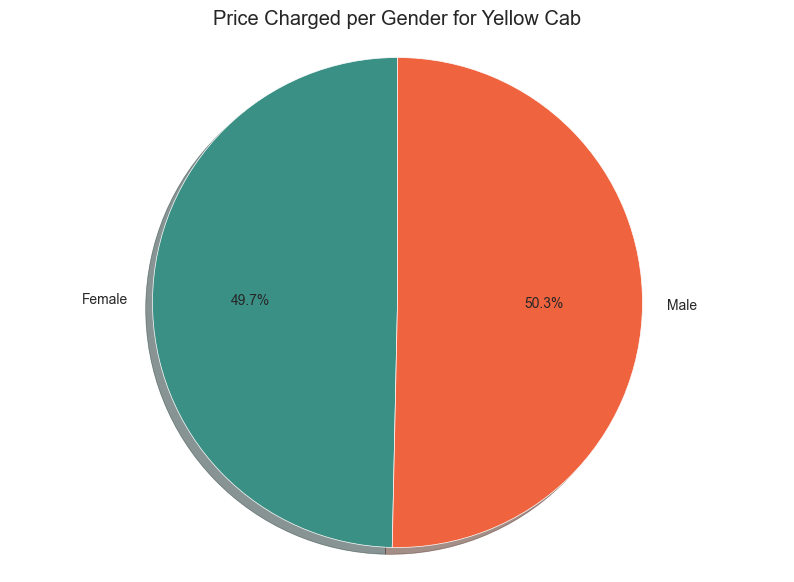

In [56]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [57]:
gender_p=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

Gender
Female   310.625
Male     310.941
Name: Price_Charged, dtype: float64

>**Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.**

In [58]:
gender_cab=data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

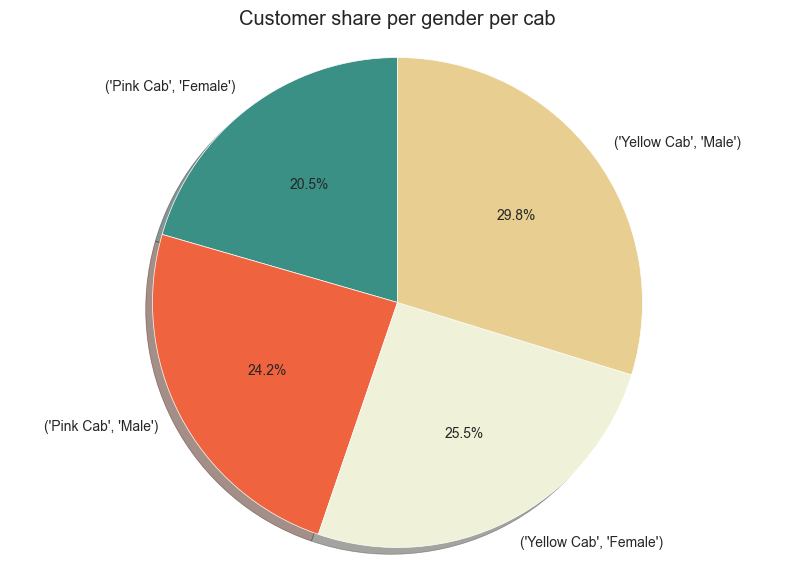

In [59]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

>**Female Customers in Yellow Cab is higher compared to Male customers**

In [60]:
data['Margins'] = (data['Price_Charged']-data['Cost_of_Trip'])
data.head()

Transaction_ID  Customer_ID        City   Company  KM_Travelled  \
0        10000011        29290  ATLANTA GA  Pink Cab        30.450   
1        10000012        27703  ATLANTA GA  Pink Cab        28.620   
2        10000013        28712  ATLANTA GA  Pink Cab         9.040   
3        10000014        28020  ATLANTA GA  Pink Cab        33.170   
4        10000015        27182  ATLANTA GA  Pink Cab         8.730   

   Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  Income  \
0        370.950       313.635      1  2016         Card   Male   28   10813   
1        358.520       334.854      1  2016         Card   Male   27    9237   
2        125.200        97.632      1  2016         Cash   Male   53   11242   
3        377.400       351.602      1  2016         Cash   Male   23   23327   
4        114.620        97.776      1  2016         Card   Male   33    8536   

  Population     Users  Margins  
0   814,885    24,701    57.315  
1   814,885    24,701    23.666  
2   814,885    24,701    27.568  
3   814,885    24,701    25.798  
4   814,885    24,701    16.844

In [61]:
data.tail()

Transaction_ID  Customer_ID           City     Company  KM_Travelled  \
359387        10440101        52392  WASHINGTON DC  Yellow Cab         4.800   
359388        10440104        53286  WASHINGTON DC  Yellow Cab         8.400   
359389        10440105        52265  WASHINGTON DC  Yellow Cab        27.750   
359390        10440106        52175  WASHINGTON DC  Yellow Cab         8.800   
359391        10440107        52917  WASHINGTON DC  Yellow Cab        12.760   

        Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  \
359387         69.240        63.360      1  2018         Cash   Male   24   
359388        113.750       106.848      1  2018         Cash   Male   32   
359389        437.070       349.650      1  2018         Cash   Male   56   
359390        146.190       114.048      1  2018         Card   Male   32   
359391        191.580       177.619      1  2018         Card   Male   20   

        Income Population      Users  Margins  
359387   15651   418,859    127,001     5.880  
359388    6528   418,859    127,001     6.902  
359389    7966   418,859    127,001    87.420  
359390    6423   418,859    127,001    32.142  
359391   11284   418,859    127,001    13.961

In [62]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

KM_Travelled  Price_Charged  Cost_of_Trip  Month   Year    Age  \
KM_Travelled          1.000          0.836         0.982 -0.002 -0.001 -0.000   
Price_Charged         0.836          1.000         0.860 -0.060 -0.037 -0.003   
Cost_of_Trip          0.982          0.860         1.000 -0.008 -0.002 -0.000   
Month                -0.002         -0.060        -0.008  1.000 -0.033 -0.002   
Year                 -0.001         -0.037        -0.002 -0.033  1.000 -0.000   
Age                  -0.000         -0.003        -0.000 -0.002 -0.000  1.000   
Income               -0.001          0.003        -0.001  0.001 -0.002  0.004   
Margins               0.463          0.864         0.486 -0.094 -0.061 -0.005   

               Income  Margins  
KM_Travelled   -0.001    0.463  
Price_Charged   0.003    0.864  
Cost_of_Trip   -0.001    0.486  
Month           0.001   -0.094  
Year           -0.002   -0.061  
Age             0.004   -0.005  
Income          1.000    0.006  
Margins         0.006    1.000

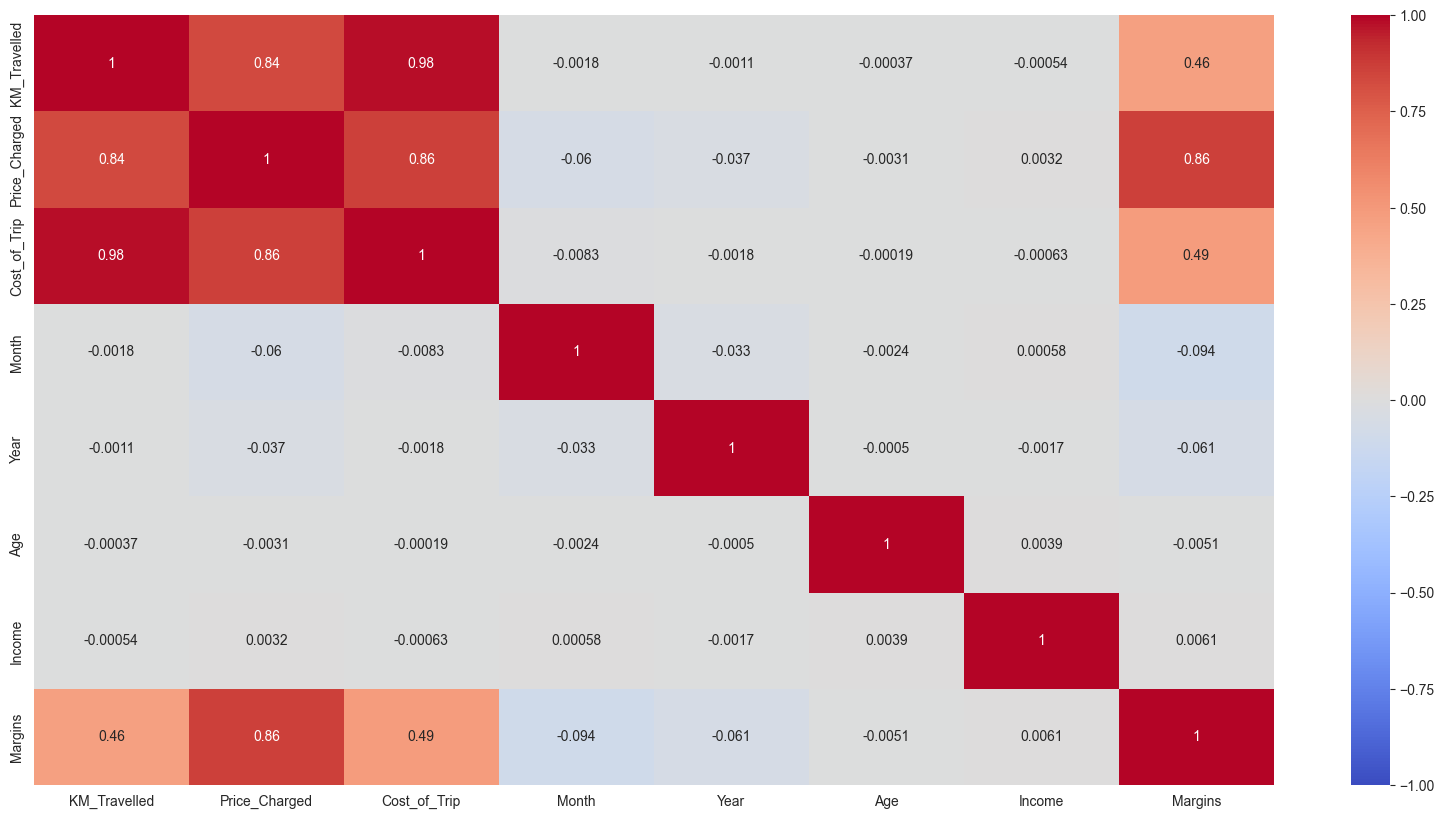

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

>**There is a correlation between Margin & Price_Charged**

In [64]:
city_m = data[data.Month==12].groupby('City').Margins.mean()
city_m

City
ATLANTA GA        96.253
AUSTIN TX         91.891
BOSTON MA         62.361
CHICAGO IL        52.397
DALLAS TX        109.465
DENVER CO        111.139
LOS ANGELES CA    81.753
MIAMI FL         100.151
NASHVILLE TN      81.460
NEW YORK NY      258.422
ORANGE COUNTY     76.135
PHOENIX AZ        76.923
PITTSBURGH PA     57.106
SACRAMENTO CA     27.119
SAN DIEGO CA      70.383
SEATTLE WA        76.515
SILICON VALLEY   167.087
TUCSON AZ         84.105
WASHINGTON DC     62.743
Name: Margins, dtype: float64

In [65]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

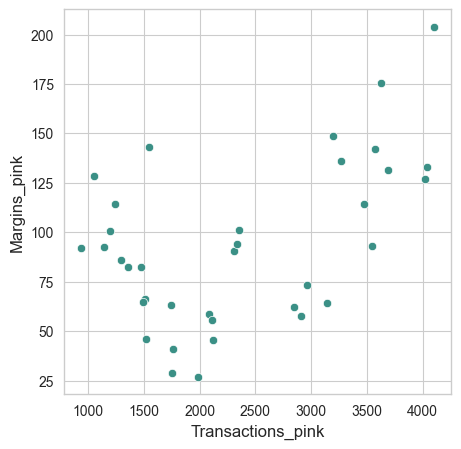

In [66]:
# Monthly Margins of Pink Cab
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

**Findings:**
- Pink Cabs increase their margins with increase in number of Transactions

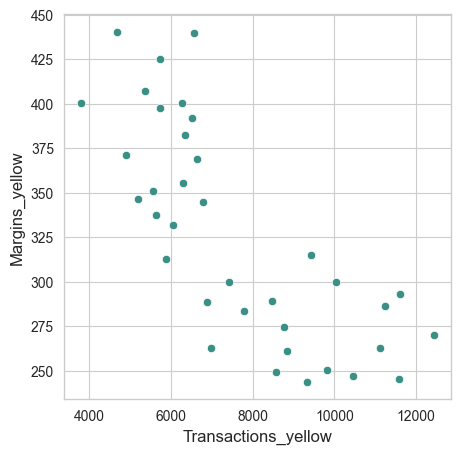

In [67]:
# Margins for Yellow cabs
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

**Findings:**
-Yellow Cab decrease the Margin with the increase in Transaction

# Hypothesis Testing

### Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [68]:
a = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494056e-25


>**Yellow Cab:** There is difference in Margin between Male and Female customers


**For Pink Cabs**

In [69]:
a = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.115153059004258


>**Pink Cab:** There is no difference in Margin between Male and Female customers

In [70]:
#Margins per Age
data[data.Age<=50].groupby('Company').Margins.mean()
data[data.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab      62.053
Yellow Cab   155.856
Name: Margins, dtype: float64

In [71]:
#Pink Cab
a = data[(data.Age<=50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')

71228 13483
P value is  0.32817487547980695
We accept null hypothesis that theres no difference


In [72]:

#Yellow Cab
a = data[(data.Age<=50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
print('P value is ', p_value)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')

231480 43201
P value is  6.4942568177993685e-09
We accept alternate hypothesis that theres a difference


**Yellow Cabs also gives discount to people older than 50**

**Is there difference in margins for Card payer and Cash payers**

In [73]:
#Pink Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')

P value is  0.7900465828793286
We accept null hypothesis that theres no difference


In [74]:
#Yellow Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.29330606382987284


>**There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab**

In [75]:
data.head()

Transaction_ID  Customer_ID        City   Company  KM_Travelled  \
0        10000011        29290  ATLANTA GA  Pink Cab        30.450   
1        10000012        27703  ATLANTA GA  Pink Cab        28.620   
2        10000013        28712  ATLANTA GA  Pink Cab         9.040   
3        10000014        28020  ATLANTA GA  Pink Cab        33.170   
4        10000015        27182  ATLANTA GA  Pink Cab         8.730   

   Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  Income  \
0        370.950       313.635      1  2016         Card   Male   28   10813   
1        358.520       334.854      1  2016         Card   Male   27    9237   
2        125.200        97.632      1  2016         Cash   Male   53   11242   
3        377.400       351.602      1  2016         Cash   Male   23   23327   
4        114.620        97.776      1  2016         Card   Male   33    8536   

  Population     Users  Margins  
0   814,885    24,701    57.315  
1   814,885    24,701    23.666  
2   814,885    24,701    27.568  
3   814,885    24,701    25.798  
4   814,885    24,701    16.844

In [76]:
data.to_csv('master_data.csv',index = False)